In [1]:
import numpy as np
import pandas as pd


In [2]:
data = pd.read_csv("insurance_claims.csv")
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
# we have to drop _c39 column as it is not of any work to us 
data=data.drop('_c39',axis='columns')

In [4]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()
# there is no null or duplicate values in our dataset

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [7]:
data['police_report_available'].replace('?', 'not confirmed', inplace=True)
data['property_damage'].replace('?', 'not confirmed', inplace=True)
data['collision_type'].replace('?', 'unknown', inplace=True)


In [8]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,not confirmed,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


<AxesSubplot:>

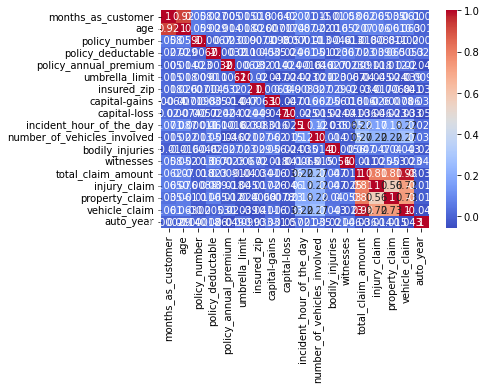

In [9]:
import seaborn as sns
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

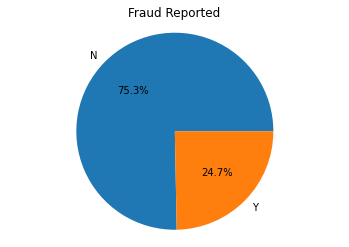

In [10]:
import matplotlib.pyplot as plt
fraud_counts = data['fraud_reported'].value_counts()

# create a pie chart
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%')
plt.title('Fraud Reported')
plt.axis('equal')
plt.show()

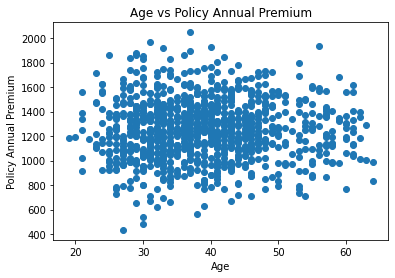

In [11]:
# create a scatter plot
plt.scatter(data['age'], data['policy_annual_premium'])
plt.xlabel('Age')
plt.ylabel('Policy Annual Premium')
plt.title('Age vs Policy Annual Premium')
plt.show()

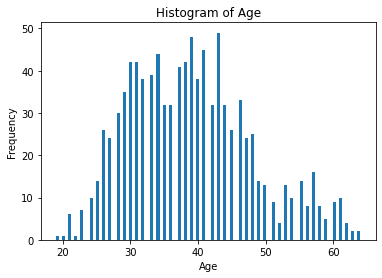

In [12]:
# create a histogram of age
plt.hist(data['age'], bins=100)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

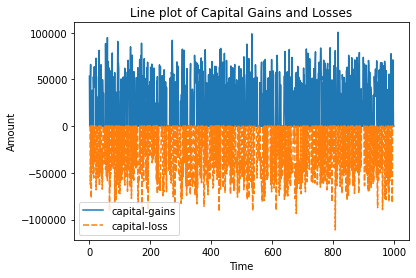

In [13]:
# Create a line plot using Seaborn
sns.lineplot(data=data[['capital-gains', 'capital-loss']])
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Line plot of Capital Gains and Losses')
plt.show()

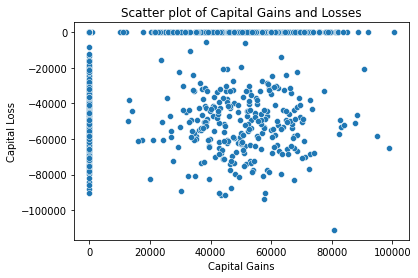

In [14]:
sns.scatterplot(x='capital-gains', y='capital-loss', data=data)
plt.xlabel('Capital Gains')
plt.ylabel('Capital Loss')
plt.title('Scatter plot of Capital Gains and Losses')
plt.show()

In [15]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['incident_type'], data['fraud_reported'])


In [16]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)


In [17]:
chi2_stat
#The contingency table shows the frequency count of each combination of incident_type and fraud_reported variables. 
#The chi-square statistic value of 29.13 suggests that there is a significant association between the two variables
#meaning they are not independent of each other.

29.131539725752873

In [18]:
p_value 


2.1013336774786627e-06

In [19]:
dof 

3

In [20]:
expected

array([[315.507, 103.493],
       [ 63.252,  20.748],
       [303.459,  99.541],
       [ 70.782,  23.218]])

In [21]:
contingency_table = pd.crosstab(data['collision_type'], data['fraud_reported'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)


In [22]:
chi2_stat 
#The contingency table and the chi-square test results suggest that 
#there is a significant association between the collision type and fraud reported. 
#The chi-square statistic is 31.3658, with a very small p-value of 7.1189e-07, and 3 degrees of freedom (dof).
#there is evidence to suggest that collision type is related to fraud reported in some way. 

31.365781459155905

In [23]:
p_value

7.118897790511356e-07

In [24]:
dof 

3

In [25]:
expected

array([[191.262,  62.738],
       [219.876,  72.124],
       [207.828,  68.172],
       [134.034,  43.966]])

In [26]:
from scipy.stats import chi2_contingency
# create a contingency table with the counts of the two categorical variables
contingency_table = pd.crosstab(data['policy_state'], data['fraud_reported'])

# perform the chi-square test and print the results
stat, p, dof, expected = chi2_contingency(contingency_table)
print('Chi-square test statistic:', stat)
print('P-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)
#In this case, the p-value is 0.5996316638296726, which is greater than 0.05, further suggesting that
#there is not a significant association between the two variables.

Chi-square test statistic: 1.022879411786087
P-value: 0.5996316638296726
Degrees of freedom: 2
Expected frequencies: [[254.514  83.486]
 [233.43   76.57 ]
 [265.056  86.944]]


In [27]:
from scipy.stats import chi2_contingency
# create a contingency table with the counts of the two categorical variables
contingency_table = pd.crosstab(data['incident_city'], data['fraud_reported'])

# perform the chi-square test and print the results
stat, p, dof, expected = chi2_contingency(contingency_table)
print('Chi-square test statistic:', stat)
print('P-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)
#In this case, since the p-value is high (0.8559), it means that there is not enough evidence
#to reject the null hypothesis that there is no significant association between the variables being tested.
#Therefore, you would conclude that there is not a significant association between the variables.

Chi-square test statistic: 2.6105178630461676
P-value: 0.8558997033560567
Degrees of freedom: 6
Expected frequencies: [[114.456  37.544]
 [112.197  36.803]
 [106.173  34.827]
 [109.185  35.815]
 [ 91.866  30.134]
 [100.902  33.098]
 [118.221  38.779]]


In [28]:
ct_city = pd.crosstab(data['incident_city'], data['fraud_reported'])
ct_city
# as we can see that arlington city has high number of fraud reported

fraud_reported,N,Y
incident_city,,
Arlington,108,44
Columbus,110,39
Hillsdale,106,35
Northbend,111,34
Northbrook,95,27
Riverwood,104,30
Springfield,119,38


In [29]:
from scipy.stats import chi2_contingency
# create a contingency table with the counts of the two categorical variables
contingency_table = pd.crosstab(data['incident_type'], data['fraud_reported'])

# perform the chi-square test and print the results
stat, p, dof, expected = chi2_contingency(contingency_table)
print('Chi-square test statistic:', stat)
print('P-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)
#a chi-square test statistic of 29.131 and a very small p-value of 2.1013336774786627e-06 suggest
#a significant association between the two variables 'incident_type' and 'fraud_reported'.

Chi-square test statistic: 29.131539725752873
P-value: 2.1013336774786627e-06
Degrees of freedom: 3
Expected frequencies: [[315.507 103.493]
 [ 63.252  20.748]
 [303.459  99.541]
 [ 70.782  23.218]]


In [30]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,not confirmed,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [31]:
data=data.drop(['policy_state','policy_bind_date'],axis='columns')

In [32]:
data.head()

,months_as_customer,age,policy_number,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,250/500,1000,1406.91,0,466132,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,not confirmed,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [33]:
fraudulent_vehicles_involved = data.groupby('fraud_reported')['number_of_vehicles_involved'].sum()
fraudulent_vehicles_involved

fraud_reported
N    1362
Y     477
Name: number_of_vehicles_involved, dtype: int64

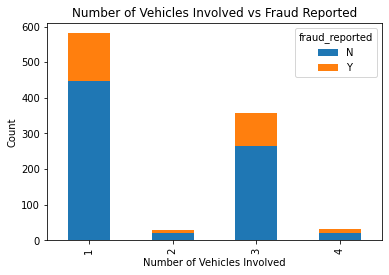

In [34]:
import matplotlib.pyplot as plt

# Create a bar plot of number_of_vehicles_involved vs fraud_reported
fraud_counts = data.groupby('number_of_vehicles_involved')['fraud_reported'].value_counts()
fraud_counts.unstack().plot(kind='bar', stacked=True)

# Set the plot title and axis labels
plt.title('Number of Vehicles Involved vs Fraud Reported')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Count')

# Show the plot
plt.show()


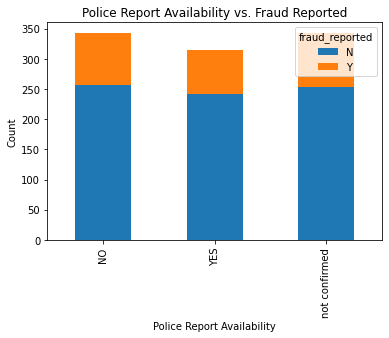

In [35]:
# create contingency table
table = pd.crosstab(data['police_report_available'], data['fraud_reported'])

# plot stacked bar chart
table.plot(kind='bar', stacked=True)
plt.title("Police Report Availability vs. Fraud Reported")
plt.xlabel("Police Report Availability")
plt.ylabel("Count")
plt.show()
#This will give you a visualization of the number of fraud reported cases and non-fraud cases, 
#depending on whether a police report was available or not.

In [36]:
contingency_table = pd.crosstab(data['fraud_reported'], data['police_report_available'])
print(contingency_table)


police_report_available   NO  YES  not confirmed
fraud_reported                                  
N                        257  242            254
Y                         86   72             89


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

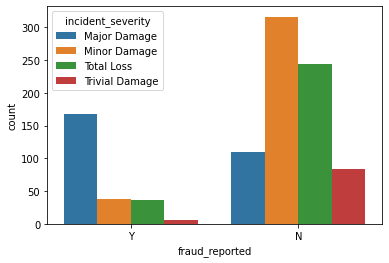

In [37]:
import seaborn as sns

sns.countplot(x='fraud_reported', hue='incident_severity', data=data)


<AxesSubplot:xlabel='fraud_reported', ylabel='injury_claim'>

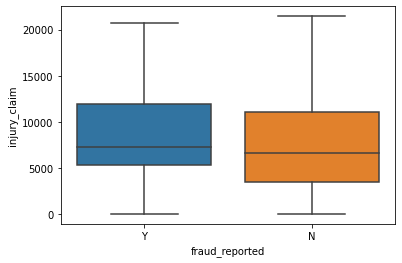

In [38]:
import seaborn as sns

sns.boxplot(x="fraud_reported", y="injury_claim", data=data)


In [39]:
data['fraud_reported'] = data['fraud_reported'].replace({'Y': 1, 'N': 0}) # here we are replacing y with 1 and n with 0
data.groupby('fraud_reported')['injury_claim'].median()
# we can see here that injury claim is higher when fraud happened


fraud_reported
0    6620.0
1    7240.0
Name: injury_claim, dtype: float64

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

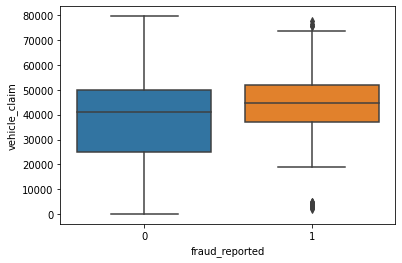

In [40]:
import seaborn as sns

sns.boxplot(x='fraud_reported', y='vehicle_claim', data=data)


In [41]:
data.groupby('fraud_reported')['vehicle_claim'].median()
# we can see that vehicle claim is higher when fraud happened

fraud_reported
0    41220.0
1    44800.0
Name: vehicle_claim, dtype: float64

In [42]:
data.groupby('fraud_reported')['total_claim_amount'].median()

fraud_reported
0    56520.0
1    61290.0
Name: total_claim_amount, dtype: float64

In [43]:
data.groupby('fraud_reported')['property_claim'].median()
# property claim is also higher when fraud happened 
# it means that by comparing all values we came to know that claims are higher when fraud happened 

fraud_reported
0    6560.0
1    7440.0
Name: property_claim, dtype: float64

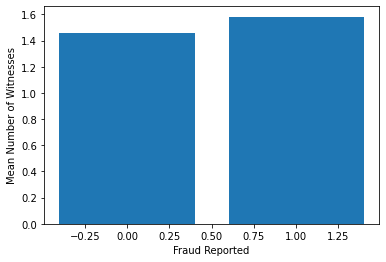

In [44]:
# Group the data by 'fraud_reported' and calculate the mean of 'witnesses' for each group
grouped_data = data.groupby('fraud_reported')['witnesses'].mean()

# Plot the bar chart to visualize the data
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Fraud Reported')
plt.ylabel('Mean Number of Witnesses')
plt.show()

In [45]:
grouped_data = data.groupby('fraud_reported')['witnesses'].mean()
grouped_data
# mean value of witnesses are higher when fraud happened

fraud_reported
0    1.455511
1    1.582996
Name: witnesses, dtype: float64

In [46]:
import pandas as pd


# create a crosstab table
ct_authorities = pd.crosstab(data['authorities_contacted'], data['fraud_reported'])

# display the table
print(ct_authorities)


fraud_reported           0   1
authorities_contacted         
Ambulance              139  57
Fire                   163  60
None                    85   6
Other                  135  63
Police                 231  61


In [47]:
fraud_counts = data['fraud_reported'].value_counts()
fraud_counts

0    753
1    247
Name: fraud_reported, dtype: int64

In [48]:
# create a crosstab table
ct_severity = pd.crosstab(data['incident_severity'], data['fraud_reported'])
# display the table
print(ct_severity)
# as we can see below from the table we get to know that when there is high number of fraud
# major damage happened in high number

fraud_reported       0    1
incident_severity          
Major Damage       109  167
Minor Damage       316   38
Total Loss         244   36
Trivial Damage      84    6


In [49]:
# create a crosstab table
ct_severity = pd.crosstab(data['collision_type'], data['fraud_reported'])
# display the table
print(ct_severity)
# as we can see below from the table we get to know that when there is high number of  fraud then
# rear collision happened and front and side collison also happened in large number

fraud_reported     0   1
collision_type          
Front Collision  184  70
Rear Collision   201  91
Side Collision   206  70
unknown          162  16


In [50]:
# calculate the mean capital-loss for all cases
mean_capital_loss_all = data['capital-loss'].mean()

# calculate the mean capital-loss for the cases where fraud_reported is 1
mean_capital_loss_fraud = data[data['fraud_reported'] == 1]['capital-loss'].mean()

print("Mean capital-loss for all cases: ", mean_capital_loss_all)
print("Mean capital-loss for fraud cases: ", mean_capital_loss_fraud)
# we can see that on average fraud cases have a higher capital-loss compared to non-fraud cases

Mean capital-loss for all cases:  -26793.7
Mean capital-loss for fraud cases:  -27522.67206477733


In [51]:
# calculate the mean capital-loss for all cases
mean_capital_gains_all = data['capital-gains'].mean()

# calculate the mean capital-loss for the cases where fraud_reported is 1
mean_capital_gains_fraud = data[data['fraud_reported'] == 1]['capital-gains'].mean()
mean_capital_gains_non_fraud=data[data['fraud_reported']==0]['capital-gains'].mean()
print('mean capital-gains for all cases :',mean_capital_gains_all)
print('mean_capital_gains_fraud:',mean_capital_gains_fraud)
print('mean_capital_gains_non_fraud',mean_capital_gains_non_fraud)

mean capital-gains for all cases : 25126.1
mean_capital_gains_fraud: 24193.522267206477
mean_capital_gains_non_fraud 25432.00531208499


In [52]:
ct_age = pd.crosstab(data['age'], data['fraud_reported'])
ct_age.head()

fraud_reported,0,1
age,,
19,0,1
20,1,0
21,6,0
22,0,1
23,3,4


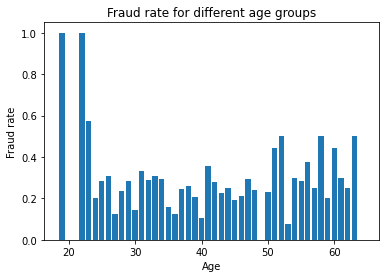

In [53]:
import matplotlib.pyplot as plt

# The data
fraud_reported = [[0, 1], [1, 0], [6, 0], [0, 1], [3, 4], [8, 2], [10, 4], [18, 8], [21, 3], [23, 7], [25, 10], [36, 6], [28, 14], [27, 11], [27, 12], [31, 13], [27, 5], [28, 4], [31, 10], [31, 11], [38, 10], [34, 4], [29, 16], [23, 9], [38, 11], [24, 8], [21, 5], [26, 7], [17, 7], [19, 6], [14, 0], [10, 3], [5, 4], [2, 2], [12, 1], [7, 3], [10, 4], [5, 3], [12, 4], [4, 4], [4, 1], [5, 4], [7, 3], [3, 1], [1, 1], [2, 0]]
ages = [age for age in range(19, 65)]

# Calculate fraud rate for each age group
fraud_rate = [fraud_reported[i][1]/(fraud_reported[i][0]+fraud_reported[i][1]) for i in range(len(ages))]

# Plot the results
plt.bar(ages, fraud_rate)
plt.xlabel('Age')
plt.ylabel('Fraud rate')
plt.title('Fraud rate for different age groups')
plt.show()
# as we can see 20 to 23 age group meaning younger persons are more likely to do fraud

In [54]:
import pandas as pd


# Group the data by the 'fraud_reported' and 'insured_sex' columns and count the number of occurrences
count = data.groupby(['fraud_reported', 'insured_sex']).size()

# Print the count
print(count)
# as you can see female has higher number of involvement than male  when the fraud happened

fraud_reported  insured_sex
0               FEMALE         411
                MALE           342
1               FEMALE         126
                MALE           121
dtype: int64


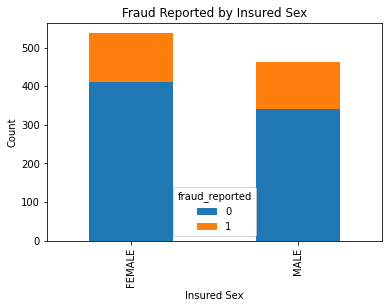

In [55]:
# create a subset of the data containing only the relevant columns
subset = data[["insured_sex", "fraud_reported"]]

# group the data by insured_sex and fraud_reported, and count the number of occurrences
grouped = subset.groupby(["insured_sex", "fraud_reported"]).size().unstack()

# plot the results as a bar plot
grouped.plot(kind="bar", stacked=True)

# add labels and title to the plot
plt.xlabel("Insured Sex")
plt.ylabel("Count")
plt.title("Fraud Reported by Insured Sex")

# show the plot
plt.show()

In [56]:
data['insured_sex'] = data['insured_sex'].replace({'MALE': 1, 'FEMALE': 0})
data['collision_type'] = data['collision_type'].replace({'Front Collision':0,'Rear Collision':1,'Side Collision':2,'unknown':3})
data['authorities_contacted'] = data['authorities_contacted'].replace({'Ambulance':5,'Fire':6,'None':7,'Other':8,'Police':9})
data['incident_type'] = data['incident_type'].replace({'Multi-vehicle Collision':3,'Parked Car':4,'Single Vehicle Collision':5,'Vehicle Theft':6})
data['incident_severity'] = data['incident_severity'].replace({'Major Damage':1,'Minor Damage':2,'Total Loss':3,'Trivial Damage':4})

In [57]:
# select the desired columns
#selected_columns = ['incident_type', 'collision_type', 'police_report_available', 
 #                   'number_of_vehicles_involved', 'incident_severity', 'injury_claim', 
  #                  'vehicle_claim', 'total_claim_amount', 'property_claim', 'witnesses', 
   #                 'authorities_contacted', 'capital-loss', 'capital-gains','insured_sex','fraud_reported']

# create a new dataframe with only the selected columns
#new_df = data[selected_columns]

# save the new dataframe to a CSV file
#new_df.to_csv("data_insurance.csv", index=False)

In [58]:
# Group the data by the 'fraud_reported' and 'incident_type' columns
count = data.groupby(['fraud_reported', 'incident_type']).size()
count
# we can see that  Multi-vehicle Collision and  Single Vehicle Collision happened in high number when fraud happened

fraud_reported  incident_type
0               3                305
                4                 76
                5                286
                6                 86
1               3                114
                4                  8
                5                117
                6                  8
dtype: int64

In [59]:
# these are the variables i have selected after doing analysis that these variables are responsible for fraud 
#incident type - Multi-vehicle Collision-3, Parked Car-4,Single Vehicle Collision-5,Vehicle Theft-6 
# police_report_available
# number_of_vehicles_involved
# incident_severity - major damage-1,minor damage-2,total loss-3,trivial damage-4
# injury_claim
# vehicle_claim
# total_claim_amount
# property_claim
# witnesses
# authorities_contacted - ambulance-5,fire-6,none-7,other-8,police-9
# collision_type - front-0,rear-1,side-2,unknown-3 
# capital-loss
# capital-gains
# insured_sex - male-1,female-0
# month_as_customer
# auto_model
# incident_date

In [60]:
# select the desired columns
#selected_columns = ['incident_type', 'collision_type', 'police_report_available', 
 #                   'number_of_vehicles_involved', 'incident_severity', 'injury_claim', 
  #                  'vehicle_claim', 'total_claim_amount', 'property_claim', 'witnesses', 
   #                 'authorities_contacted', 'capital-loss', 'capital-gains','insured_sex','fraud_reported']

# create a new dataframe with only the selected columns
#new_df = data[selected_columns]

# save the new dataframe to a CSV file
#new_df.to_csv("new_dataset.csv", index=False)

In [61]:
data.head()

,months_as_customer,age,policy_number,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,250/500,1000,1406.91,0,466132,1,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,250/500,2000,1197.22,5000000,468176,1,MD,...,0,not confirmed,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,100/300,2000,1413.14,5000000,430632,0,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,250/500,2000,1415.74,6000000,608117,0,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,500/1000,1000,1583.91,6000000,610706,1,Associate,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [62]:
# Select the 'months_as_customer' column for rows where 'fraud_reported' equals 1
fraud_months_as_customer = data.loc[data['fraud_reported'] == 1, 'months_as_customer']

print(fraud_months_as_customer)

0      328
1      228
3      256
5      256
14     180
      ... 
974    234
977    266
982    230
986    232
987    235
Name: months_as_customer, Length: 247, dtype: int64


In [63]:
non_fraud_months_as_customer = data.loc[data['fraud_reported'] == 0, 'months_as_customer']
print(non_fraud_months_as_customer)

2      134
4      228
6      137
7      165
8       27
      ... 
995      3
996    285
997    130
998    458
999    456
Name: months_as_customer, Length: 753, dtype: int64


In [64]:
import pandas as pd

# Create a dictionary with the two lists as values
#data = {'non_fraud_months_as_customer': non_fraud_months_as_customer, 
 #       'fraud_months_as_customer': fraud_months_as_customer}

# Create a new DataFrame using the dictionary
#df = pd.DataFrame(data)

# Export the DataFrame to CSV
#df.to_csv('my_months_as_customers.csv', index=False)


In [65]:
data['policy_deductable'].describe()

count    1000.000000
mean     1136.000000
std       611.864673
min       500.000000
25%       500.000000
50%      1000.000000
75%      2000.000000
max      2000.000000
Name: policy_deductable, dtype: float64

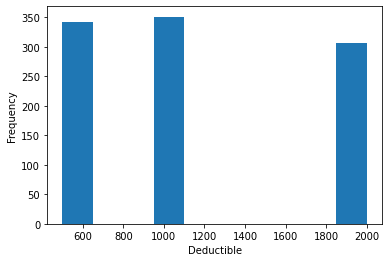

In [66]:
import matplotlib.pyplot as plt

plt.hist(data['policy_deductable'], bins=10)
plt.xlabel('Deductible')
plt.ylabel('Frequency')
plt.show()


In [67]:
import pandas as pd
from scipy.stats import chi2_contingency
# Create the contingency table
cont_table = pd.crosstab(data['policy_deductable'], data['fraud_reported'])

# Perform the chi-squared test
chi2, p_val, dof, expected = chi2_contingency(cont_table)

# Print the results
print(f"Chi-squared test: chi2 = {chi2}, p-value = {p_val}")
# there is not enough evidence to suggest that there is a significant association between the variables.

Chi-squared test: chi2 = 1.4760995579420264, p-value = 0.47804530102090015


In [68]:
cont_table

fraud_reported,0,1
policy_deductable,,
500,255,87
1000,272,79
2000,226,81


In [69]:
# Create a contingency table of auto_model and fraud_reported
contingency_table_model = pd.crosstab(data['auto_model'], data['fraud_reported'])
contingency_table_model.head()
# we can see that highest number of fraud_happened when RAM-14,A3-10,A5-11,F150-10,JETTA-10 model was involved

fraud_reported,0,1
auto_model,,
3 Series,17,1
92x,20,8
93,20,5
95,22,5
A3,27,10


In [70]:
# Run the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table_model)

# Print the chi-squared test statistic and p-value
print('Chi-squared test statistic:', chi2)
print('P-value:', p_value)
# there is no strong evidence to suggest that auto_model is responsible for fraud in this dataset.

Chi-squared test statistic: 46.65817014569841
P-value: 0.15826457876312205


In [71]:
cont_table_date = pd.crosstab(data['incident_date'], data['fraud_reported'])
cont_table_date

fraud_reported,0,1
incident_date,,
01-01-2015,14,5
01-02-2015,12,6
01-03-2015,8,4
02-01-2015,7,4
02-02-2015,19,9
03-01-2015,14,4
03-02-2015,11,2
04-01-2015,11,1
04-02-2015,16,8


In [72]:
# these are the variables i have selected after doing analysis that these variables are responsible for fraud 
#incident type - Multi-vehicle Collision-3, Parked Car-4,Single Vehicle Collision-5,Vehicle Theft-6 
# police_report_available
# number_of_vehicles_involved
# incident_severity - major damage-1,minor damage-2,total loss-3,trivial damage-4
# injury_claim
# vehicle_claim
# total_claim_amount
# property_claim
# witnesses
# authorities_contacted - ambulance-5,fire-6,none-7,other-8,police-9
# collision_type - front-0,rear-1,side-2,unknown-3 
# capital-loss
# capital-gains
# insured_sex - male-1,female-0
# month_as_customer

In [73]:
cont_table_edu = pd.crosstab(data['insured_education_level'], data['fraud_reported'])
cont_table_edu

fraud_reported,0,1
insured_education_level,,
Associate,111,34
College,90,32
High School,124,36
JD,119,42
MD,106,38
Masters,111,32
PhD,92,33


In [74]:
# Run the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(cont_table_edu)
# Print the chi-squared test statistic and p-value
print('Chi-squared test statistic:', chi2)
print('P-value:', p_value)
# there is no significant association between the insured education level and fraud reported.

Chi-squared test statistic: 1.6882273540205779
P-value: 0.9460265140372582


In [75]:
cont_table_occu = pd.crosstab(data['insured_occupation'], data['fraud_reported'])
cont_table_occu

fraud_reported,0,1
insured_occupation,,
adm-clerical,54,11
armed-forces,52,17
craft-repair,52,22
exec-managerial,48,28
farming-fishing,37,16
handlers-cleaners,43,11
machine-op-inspct,71,22
other-service,59,12
priv-house-serv,59,12


In [76]:
# Run the chi-squared test
chi2, p_value, dof, expected = chi2_contingency(cont_table_occu)

# Print the chi-squared test statistic and p-value
print('Chi-squared test statistic:', chi2)
print('P-value:', p_value)
# there is no significant association between the insured occupation and fraud reported. 

Chi-squared test statistic: 17.659340491516012
P-value: 0.17088761164902544


In [77]:
# these are the variables i have selected after doing analysis that these variables are responsible for fraud 
#incident type - Multi-vehicle Collision-3, Parked Car-4,Single Vehicle Collision-5,Vehicle Theft-6 
# police_report_available
# number_of_vehicles_involved
# incident_severity - major damage-1,minor damage-2,total loss-3,trivial damage-4
# injury_claim
# vehicle_claim
# total_claim_amount
# property_claim
# witnesses
# authorities_contacted - ambulance-5,fire-6,none-7,other-8,police-9
# collision_type - front-0,rear-1,side-2,unknown-3 
# capital-loss
# capital-gains
# insured_sex - male-1,female-0
# month_as_customer

In [78]:
data.head()

,months_as_customer,age,policy_number,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,250/500,1000,1406.91,0,466132,1,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,250/500,2000,1197.22,5000000,468176,1,MD,...,0,not confirmed,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,100/300,2000,1413.14,5000000,430632,0,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,250/500,2000,1415.74,6000000,608117,0,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,500/1000,1000,1583.91,6000000,610706,1,Associate,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [79]:
data['police_report_available'] = data['police_report_available'].replace({'YES': 1, 'NO': 0,'not confirmed':2})
data = data.rename(columns={'capital-gains': 'Capital_Gain'})
data = data.rename(columns={'capital-loss': 'Capital_Loss'})

In [80]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'Capital_Gain', 'Capital_Loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [81]:
# Select columns you want to use as independent variables
independent_vars = ['incident_type', 'police_report_available', 'number_of_vehicles_involved', 'incident_severity', 'injury_claim', 'vehicle_claim', 'total_claim_amount', 'property_claim', 'witnesses', 'authorities_contacted', 'collision_type', 'Capital_Loss', 'Capital_Gain', 'insured_sex']

# Create a new dataframe that includes only the selected columns
x = data[independent_vars]

# Print the first few rows of the new dataframe to verify that it looks correct
x

,incident_type,police_report_available,number_of_vehicles_involved,incident_severity,injury_claim,vehicle_claim,total_claim_amount,property_claim,witnesses,authorities_contacted,collision_type,Capital_Loss,Capital_Gain,insured_sex
0,5,1,1,1,6510,52080,71610,13020,2,9,2,0,53300,1
1,6,2,1,2,780,3510,5070,780,0,9,3,0,0,1
2,3,0,3,2,7700,23100,34650,3850,3,9,1,0,35100,0
3,5,0,1,1,6340,50720,63400,6340,2,9,0,-62400,48900,0
4,6,0,1,2,1300,4550,6500,650,1,7,3,-46000,66000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5,2,1,2,17440,61040,87200,8720,1,6,0,0,0,0
996,5,2,1,1,18080,72320,108480,18080,3,6,1,0,70900,0
997,3,1,3,2,7500,52500,67500,7500,3,9,2,0,35100,0
998,5,1,1,1,5220,36540,46980,5220,1,8,1,0,0,1


In [82]:
import numpy as np
dependent_vars = ['fraud_reported']
# Create a new dataframe that includes only the selected columns
y = data[dependent_vars]
y = np.ravel(y)
# Print the first few rows of the new dataframe to verify that it looks correct
y

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [83]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets (use a 70-30 split in this)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [84]:
x_train

,incident_type,police_report_available,number_of_vehicles_involved,incident_severity,injury_claim,vehicle_claim,total_claim_amount,property_claim,witnesses,authorities_contacted,collision_type,Capital_Loss,Capital_Gain,insured_sex
29,5,0,1,2,14100,63450,91650,14100,2,9,1,0,0,0
535,5,1,1,1,6550,39300,52400,6550,0,8,2,-71900,0,0
695,6,0,1,4,300,2100,2700,300,1,9,3,-72500,46700,0
557,6,1,1,2,860,3440,5160,860,2,9,3,-36500,0,1
836,5,1,1,3,21330,56880,85320,7110,1,9,1,0,52100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,1,3,1,6650,53200,79800,19950,2,9,1,-56400,0,0
270,3,1,3,2,17060,59710,85300,8530,0,9,1,0,55400,1
860,3,1,3,2,10700,37450,58850,10700,2,8,1,-45300,0,0
435,5,0,1,3,7340,58720,73400,7340,0,9,2,0,55200,1


In [85]:
x_test

,incident_type,police_report_available,number_of_vehicles_involved,incident_severity,injury_claim,vehicle_claim,total_claim_amount,property_claim,witnesses,authorities_contacted,collision_type,Capital_Loss,Capital_Gain,insured_sex
521,5,2,1,3,16020,56070,88110,16020,3,5,1,0,31500,0
737,3,1,3,3,5280,42240,52800,5280,3,5,0,0,61600,0
740,3,2,3,2,13520,47320,67600,6760,3,8,1,-61000,0,0
660,3,0,3,3,6280,43960,62800,12560,0,9,0,-64900,42700,1
411,4,1,1,4,620,4960,6820,1240,0,9,3,-29900,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,5,1,1,2,7860,27510,43230,7860,3,6,1,-45300,0,1
332,4,2,1,4,940,3760,5640,940,2,7,3,-53600,67000,0
208,3,0,4,3,7230,43380,65070,14460,3,9,2,0,0,1
613,3,1,3,2,6630,59670,79560,13260,2,9,0,-90100,57900,1


In [86]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [88]:
# Create a logistic regression model and fit it to the training data
lr = LogisticRegression()


In [90]:
lr.fit(x_train, y_train)

LogisticRegression()

In [92]:
lr.score(x_test,y_test)

0.73

In [97]:
# Use the trained model to make predictions on the testing data
y_pred = lr.predict(x_test)

In [98]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.73


In [111]:
lr.predict(x_test)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)